<a href="https://colab.research.google.com/github/dee-kay05/chatbot/blob/main/AI_ML_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
df = pd.read_csv('/diabetes (2).csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [10]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
df.shape

(768, 9)

In [17]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [19]:
x = df.drop(columns=['Outcome']) #Remove outcome column
y = df['Outcome'] #Target column (1=Diabetic, 0=Non-Diabetic)

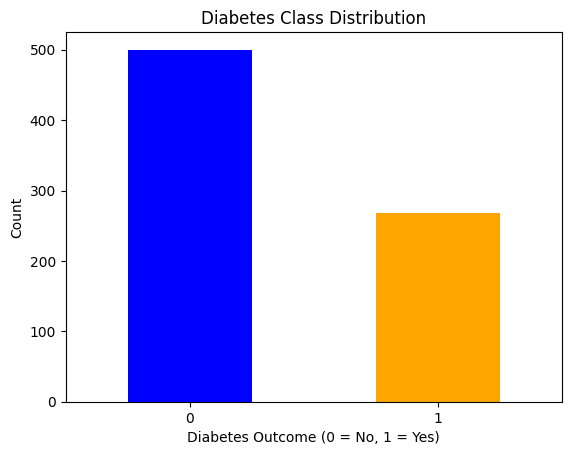

In [23]:
counts=df['Outcome'].value_counts()
#Barplot
counts.plot(kind='bar', color=['blue','orange'])
plt.xlabel("Diabetes Outcome (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Diabetes Class Distribution")
plt.xticks(rotation=0) #keep labels horizontal
plt.show()

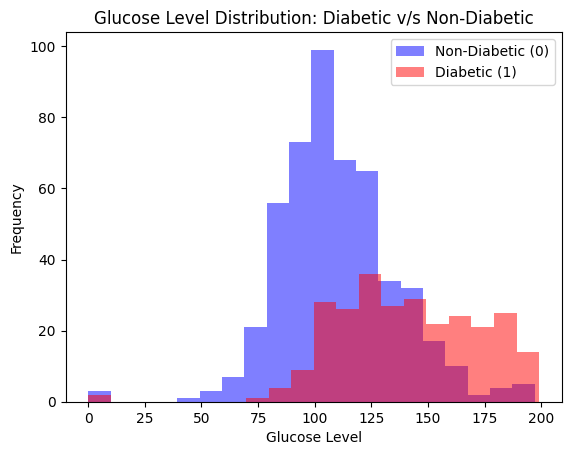

In [26]:
import matplotlib.pyplot as plt
plt.hist(df[df['Outcome'] == 0]['Glucose'], bins=20, alpha=0.5, label="Non-Diabetic (0)", color='blue')
plt.hist(df[df['Outcome'] == 1]['Glucose'], bins=20, alpha=0.5, label="Diabetic (1)", color='red')
plt.xlabel("Glucose Level")
plt.ylabel("Frequency")
plt.title("Glucose Level Distribution: Diabetic v/s Non-Diabetic")
plt.legend()
plt.show()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
#Train an SVM classifier
model = SVC(kernel='linear', C=1.0)
model.fit(X_train_scaled, y_train)

#Make prediction
y_pred = model.predict(X_test_scaled)

In [37]:
accuracy = accuracy_score(y_test, y_pred)*100
print(f"\nModel Accuracy: {accuracy:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Model Accuracy: 75.97%

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [40]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[81 18]
 [19 36]]


In [45]:
#Example patient data [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]
new_patient = np.array([[4, 230, 90, 45, 100, 35.0, 0.5, 55]])

#Scale the data
new_patient_scaled = scaler.transform(new_patient)

#Predict
prediction = model.predict(new_patient_scaled)

#Print result
print("\nPredicted Diabetes Outcome for New Patient:", "Diabetic"
      if prediction[0] == 1

      else
      "Non Diabetic")


Predicted Diabetes Outcome for New Patient: Diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
